# Evaluate whether your dataset is suitable for training in a Large Language Models LLM 

The goal of performing Exploratory Data Analysis (EDA) and Readability Analysis in the context of preparing data for training a language model  is different from evaluating a trained machine learning model using classical evaluation metrics like accuracy, p-value, and mean square error.

Understanding the Purpose of Different Analyses:<br>

1. Exploratory Data Analysis (EDA):<br>

- Purpose: To understand the underlying characteristics and quality of the dataset before using it for training a model.
- Techniques Used: Distribution plots, summary statistics, and comparisons between different groups in the dataset.
- Outcome: Insights into data quality, distribution, and potential preprocessing needs. It ensures the data is suitable for model training.

2. Readability Analysis:<br>

- Purpose: To assess the complexity and readability of the text data, ensuring that it meets the desired readability standards for your target audience.
- Techniques Used: Readability scores such as Flesch Reading Ease, Flesch-Kincaid Grade, and SMOG Index.
- Outcome: Ensures the generated text is understandable and appropriate for the intended users.

Classical Evaluation Metrics:<br>
3. Model Evaluation Metrics (e.g., Accuracy, p-value, Mean Square Error):
-  Purpose: To evaluate the performance of a trained machine learning model.
- Techniques Used:
- - Accuracy: Measures the proportion of correctly predicted instances out of the total instances.
- - p-value: Used in hypothesis testing to determine the statistical significance of results.
- - Mean Square Error (MSE): Measures the average of the squares of the errors between predicted and actual values.
- Outcome: Provides a quantitative measure of the model's predictive performance and helps in comparing different models or configurations.

4. Why Use EDA and Readability Analysis Before Model Training?
- Data Suitability: Before training a model, it's essential to ensure that the data is of high quality and suitable for the task. EDA helps identify any issues with the data, such as missing values, outliers, or incorrect data types.

- Understand Data Distribution: EDA provides insights into the distribution of data, which can help in making informed decisions about data preprocessing and model selection.

- Readability for NLP Models: For natural language processing (NLP) tasks, readability analysis ensures that the text data is appropriate for the target audience. It helps in evaluating whether the generated text is easy to understand or too complex.

- Ensuring Balanced Data: Comparing definitions with and without synonyms can help ensure that the training data is balanced and not biased towards one type of text.

To evaluate whether your dataset is suitable for training a LLM, you can perform Exploratory Data Analysis (EDA), Statistical Tests of Comparisons, and Hypothesis Evaluation before feeding it into LLM. Here’s a step-by-step approach:

1. Load and Inspect the Data
2. Perform EDA
3. Statistical Tests and Hypothesis Evaluation
4. Prepare Data for LLM

## Step 1: Load and Inspect the Data

In [1]:
import pandas as pd

# Load the data
data1 = pd.read_csv(r"C:\Users\arcad\Labs_term2\df_agile_glossary.csv")
data2 = pd.read_csv(r"C:\Users\arcad\Labs_term2\df_agile_glossary2.csv")

# Combine datasets
data = pd.concat([data1, data2], ignore_index=True)

# Inspect the data
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())


                  Term                                         Definition   
0  Acceptance Criteria  Acceptance Criteria are criteria set by the pr...  \
1      Acceptance Test  An Acceptance Test is a testing phase to verif...   
2                Agile  Agile is a project management and software dev...   
3     Agile Ceremonies  Agile Ceremonies are prescribed events in the ...   
4       Agile Coaching  Agile Coaching is the process of guiding and m...   

                       Synonym  
0          Completion Criteria  
1           Validation Testing  
2  Adaptive Project Management  
3                Agile Rituals  
4              Agile Mentoring  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Term        140 non-null    object
 1   Definition  140 non-null    object
 2   Synonym     92 non-null     object
dtypes: object(3)
memory usage: 3.4

## Step 2: Perform EDA

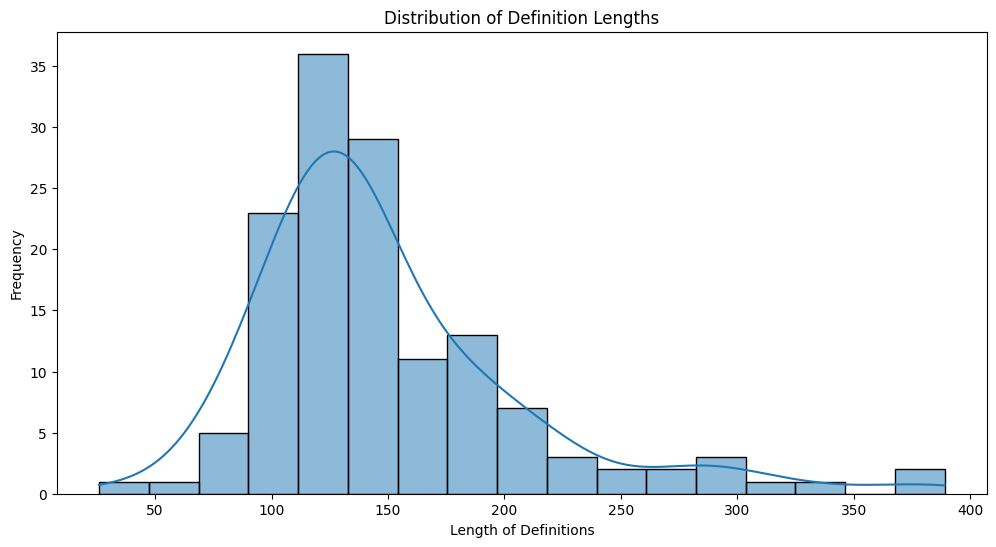

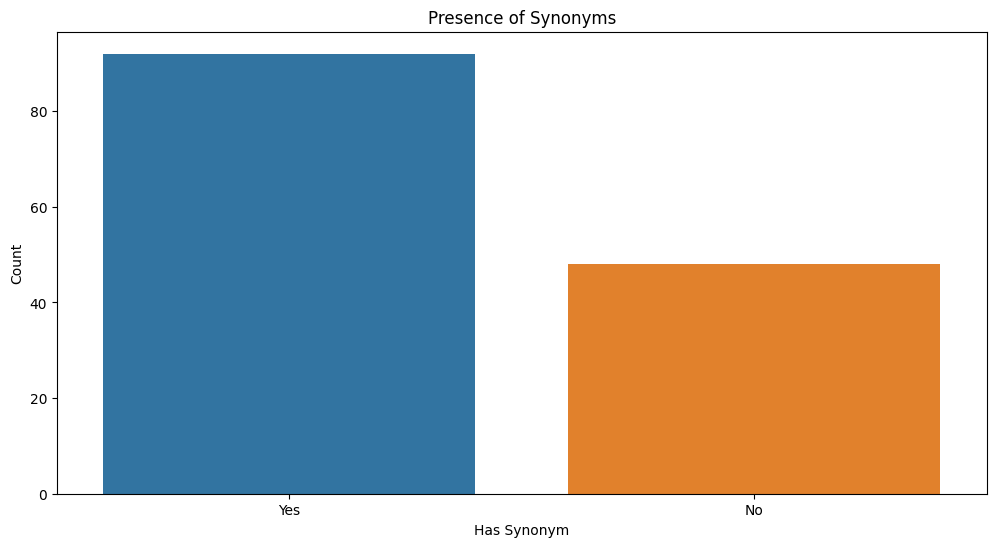

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Definitions
plt.figure(figsize=(12, 6))
sns.histplot(data['Definition'].str.len(), kde=True)
plt.title('Distribution of Definition Lengths')
plt.xlabel('Length of Definitions')
plt.ylabel('Frequency')
plt.show()

# Check the presence of synonyms
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Synonym'].apply(lambda x: 'Yes' if isinstance(x, str) and x else 'No'))
plt.title('Presence of Synonyms')
plt.xlabel('Has Synonym')
plt.ylabel('Count')
plt.show()


## Step 3: Statistical Tests and Hypothesis Evaluation

### Step 3.1: Comparing Definitions with and without Synonyms

In [3]:
from scipy import stats

# Fill NaN values in 'Synonym' column
data['Synonym'] = data['Synonym'].fillna('')

# Add a column for length of definitions
data['Definition_Length'] = data['Definition'].str.len()

# Separate data into groups
data_with_synonyms = data[data['Synonym'] != '']
data_without_synonyms = data[data['Synonym'] == '']

# T-test for Definition Lengths
t_stat, p_val = stats.ttest_ind(data_with_synonyms['Definition_Length'], data_without_synonyms['Definition_Length'])

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in definition lengths between terms with and without synonyms.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in definition lengths between terms with and without synonyms.")


T-Statistic: -2.5640375283891124
P-Value: 0.011416185401333696
Reject the null hypothesis: There is a significant difference in definition lengths between terms with and without synonyms.


### Step 3.2: Readability Analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arcad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       flesch_reading_ease  flesch_kincaid_grade  smog_index
count           140.000000            140.000000  140.000000
mean             49.955303             11.590621   14.198521
std              25.871201              4.143015    3.612860
min             -24.236667              0.516667    3.129100
25%              35.211870              8.982560   11.208143
50%              51.072609             11.646864   14.554593
75%              68.128977             13.995586   17.122413
max             114.067857             23.347407   22.076136


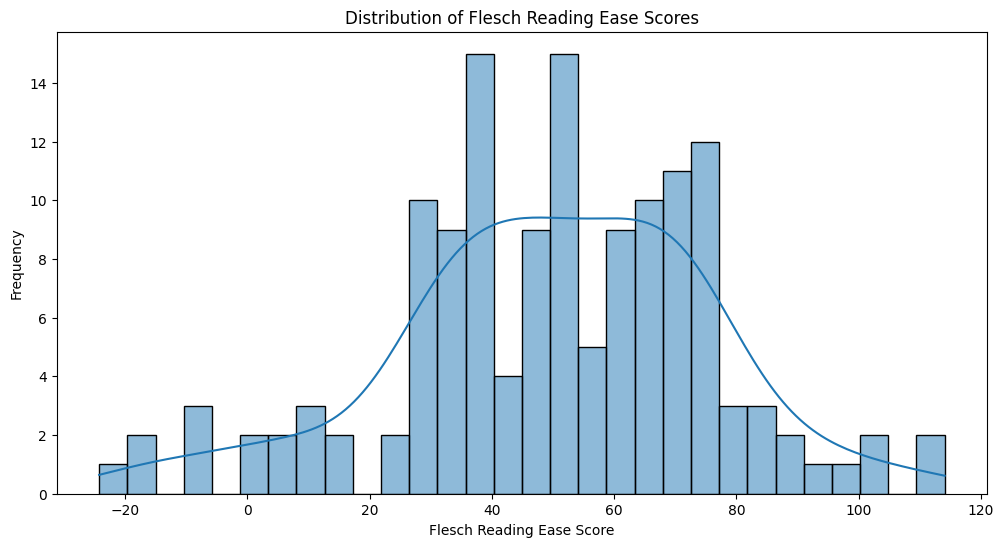

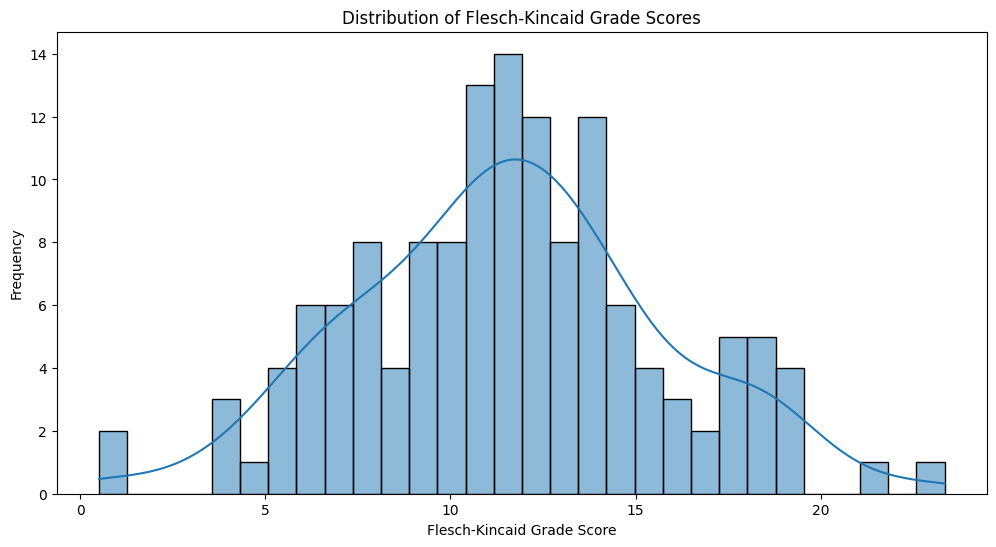

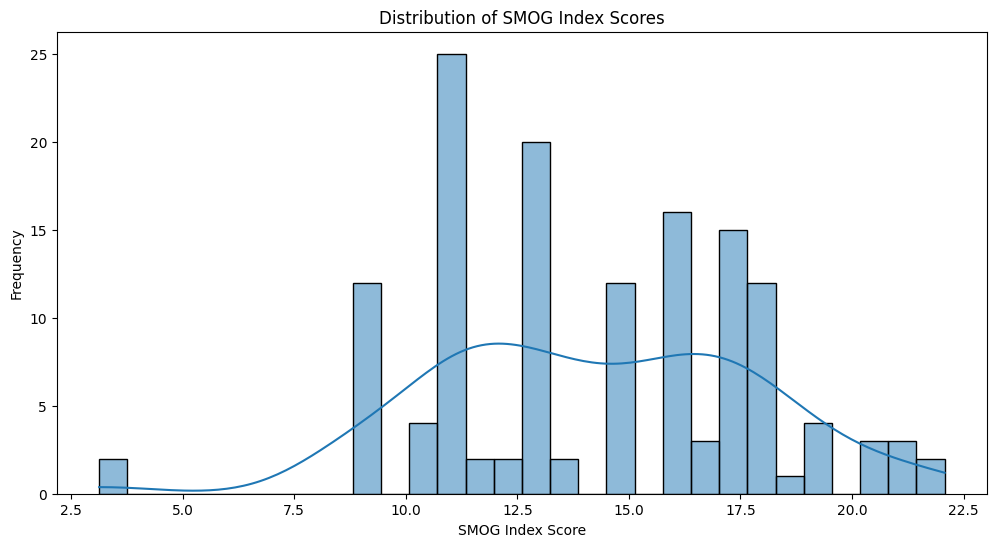

In [4]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

# Function to count syllables in a word
def count_syllables(word):
    if not word:
        return 0
    vowels = "aeiouy"
    word = word.lower().strip(".:;?!")
    if len(word) == 0:
        return 0
    if word[0] in vowels:
        count = 1
    else:
        count = 0
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if word.endswith("le") and len(word) > 2 and word[-3] not in vowels:
        count += 1
    if count == 0:
        count = 1
    return count

# Function to calculate readability scores
def calculate_readability(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    syllables = sum(count_syllables(word) for word in words if word.isalpha())
    polysyllables = sum(1 for word in words if count_syllables(word) >= 3)
    
    total_words = len(words)
    total_sentences = len(sentences)
    
    if total_sentences == 0 or total_words == 0:
        return {
            'flesch_reading_ease': None,
            'flesch_kincaid_grade': None,
            'smog_index': None
        }
    
    flesch_reading_ease = 206.835 - 1.015 * (total_words / total_sentences) - 84.6 * (syllables / total_words)
    flesch_kincaid_grade = 0.39 * (total_words / total_sentences) + 11.8 * (syllables / total_words) - 15.59
    smog_index = 1.0430 * (polysyllables * (30 / total_sentences))**0.5 + 3.1291
    
    return {
        'flesch_reading_ease': flesch_reading_ease,
        'flesch_kincaid_grade': flesch_kincaid_grade,
        'smog_index': smog_index
    }

# Calculate readability scores
data['Readability'] = data['Definition'].apply(calculate_readability)

# Extract readability scores into separate columns
readability_df = pd.json_normalize(data['Readability'])
data = pd.concat([data, readability_df], axis=1)

# Drop the intermediate 'Readability' column
data = data.drop(columns=['Readability'])

# Summary statistics for readability scores
print(data[['flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index']].describe())

# Visualize readability scores
plt.figure(figsize=(12, 6))
sns.histplot(data['flesch_reading_ease'].dropna(), kde=True, bins=30)
plt.title('Distribution of Flesch Reading Ease Scores')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['flesch_kincaid_grade'].dropna(), kde=True, bins=30)
plt.title('Distribution of Flesch-Kincaid Grade Scores')
plt.xlabel('Flesch-Kincaid Grade Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['smog_index'].dropna(), kde=True, bins=30)
plt.title('Distribution of SMOG Index Scores')
plt.xlabel('SMOG Index Score')
plt.ylabel('Frequency')
plt.show()


1. Flesch Reading Ease Scores: The Flesch Reading Ease score is designed to indicate how difficult a passage in English is to understand.

Interpretation:
- 90-100: Very easy to read (easily understood by an average 11-year-old student)
- 80-90: Easy to read
- 70-80: Fairly easy to read
- 60-70: Plain English, easily understood by 13- to 15-year-old students
- 50-60: Fairly difficult to read
- 30-50: Difficult to read, best understood by college graduates
- 0-30: Very difficult to read, best understood by university graduates


2. Flesch-Kincaid Grade Scores:
The Flesch-Kincaid Grade Level score is designed to indicate the grade level of the text.

Score Range: There is no fixed range, but typically the score will be between 0 and 20. <br>
Interpretation:
- A score of 8.0 means that an eighth grader should be able to understand the text.
- A score of 12.0 means that a high school senior should be able to understand the text.
- Higher scores indicate that the text is more difficult to read and requires higher grade-level education to understand.

3. SMOG Index Scores:
The SMOG (Simple Measure of Gobbledygook) Index estimates the years of education a person needs to understand a piece of writing.

Score Range: Typically, the score will be between 0 and 20.<br>
Interpretation:
- A score of 8 means that an eighth grader should be able to understand the text.
- A score of 12 means that a high school senior should be able to understand the text.
- Higher scores indicate that the text is more difficult to read and requires higher grade-level education to understand.

### Step 3.2.1: Analysis of Readability Scores


The readability analysis for your dataset provides the following summary statistics:

Readability Scores Summary:<br>
Flesch Reading Ease:<br>

Mean: 49.96
Standard Deviation: 25.87
Min: -24.24
Max: 114.07

Flesch-Kincaid Grade:<br>

Mean: 11.59
Standard Deviation: 4.14
Min: 0.52
Max: 23.35

SMOG Index:<br>

Mean: 14.20
Standard Deviation: 3.61
Min: 3.13
Max: 22.08
These results suggest the following:

The average Flesch Reading Ease score is around 50, which is considered fairly difficult to read (easily understood by 13- to 15-year-old students).<br>

The average Flesch-Kincaid Grade level is around 11.6, indicating that the text is suitable for high school juniors or seniors.<br>

The SMOG Index suggests that a person would need around 14 years of education (first-year college level) to understand the text.

## Step 4: Prepare Data for LLM

After ensuring that the data is suitable for training, save it in a format that LLM can use.

In [5]:
# Extract definitions for training
definitions = data['Definition'].tolist()

# Save definitions to a text file
with open('definitions.txt', 'w') as f:
    for definition in definitions:
        f.write(definition + "\n")
